In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

In [5]:
def model(x, w, b):
    return w*x + b

In [ ]:
def compute_cost(x, y, w, b):
    m = x.shape[0]

    error = np.subtract(model(x, w, b), y)
    total_cost = np.sum(np.square(error))
    normalized_cost = total_cost / (2 * m)

    return normalized_cost

In [94]:
def plot_data(x_train, y_train):
    # Adding a SubPlot - sp1
    sp1 = plt.subplot(111)

    # Plotting the data points on the graph
    sp1.scatter(x_train, y_train, marker = "x", color = "r")

    # Specifying the labels on the graph
    sp1.xaxis.set_label("$x$ (feature)")
    sp1.yaxis.set_label("$y$ (target)")
    sp1.set_title("$f_{w,b}$")

    plt.show()

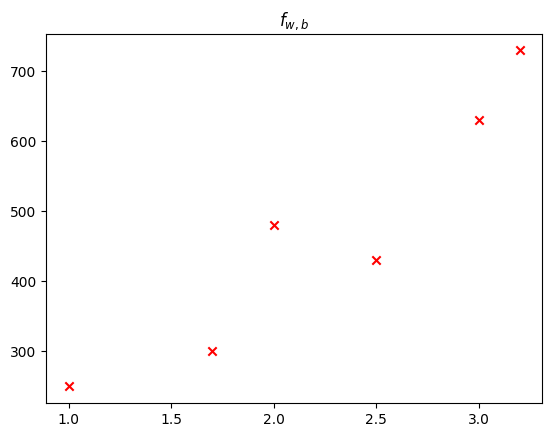

In [95]:
plot_data(x_train, y_train)

In [83]:
def soup_bowl(x_train, y_train):
    fig = plt.figure(figsize = (8, 8))
    transparent_color = (1.0, 1.0, 1.0, 0.0)

    # Adding a SubPlot - sp2
    sp2 = fig.add_subplot(112, projection = '3d')

    # Sets the axes' background color to transparent
    sp2.xaxis.set_pane_color(transparent_color)
    sp2.yaxis.set_pane_color(transparent_color)
    sp2.zaxis.set_pane_color(transparent_color)

    # Setting the viweing angle
    sp2.zaxis.set_rotate_label(False)
    sp2.view_init(30, -120)

    # Evenly spaces out the values of w and b across (-20, 20) in 100 divisions
    w = np.linspace(-1, 1, 100)
    b = np.linspace(-1000, 1000, 100)

    # Get the z value for a bowl-shaped cost function
    J_wb = np.zeros((w.shape[0], b.shape[0]))
    for i, x in enumerate(w):
        for j, y in enumerate(b):
            J_wb[i,j] = compute_cost(x_train, y_train, x, y)

    # Meshgrid used for plotting 3D functions
    '''
    Purpose -
    - Sets the output parameters as 2D arrays of points (initially they were 1D)
    - Takes an array like [0.  0.5 1. ] and [0.  1. ] and converts it into [[0.  0.5 1. ], [0.  0.5 1. ]] (fixes horizontally and multiplies vertically) and [[0.  0.  0. ], [1.  1.  1. ]] (fixes vertically and multiplies horizontally)
    '''
    W, B = np.meshgrid(w, b)

    # Create the 3D surface plot of the bowl-shaped cost function
    '''
    Properties -
    : cmap : Sets the color of the map to be plain, coloured (Spectral is similar to terrain classification), etc.
    : alpha : Sets the opacity of the surface
    : antialiased : Makes the surface appear smooth when turned on (Not pixelated/jagged)
    '''
    sp2.plot_surface(W, B, J_wb, cmap = "Spectral", alpha = 0.7, antialiased = True)

    # Makes the wireframe over the surface (highlights the mesh)
    '''
    Properties -
    : color : Sets the color of the wireframe ('k' as black)
    : alpha : Sets the opacity of the wireframe
    '''
    sp2.plot_wireframe(W, B, J_wb, color = 'k', alpha = 0.1)

    # Setting axes' labels amd titles
    sp2.set_xlabel("$w$")
    sp2.set_ylabel("$b$")
    sp2.set_zlabel("$J(w,b)$", rotation=90) # Rotation specifies text being rotated to vertical position
    sp2.set_title("$J(w,b)$", size=15)

    plt.show()

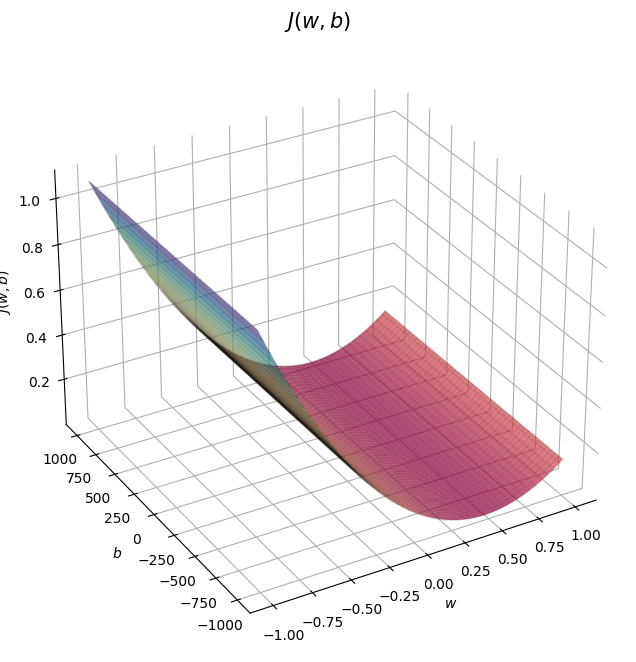

In [84]:
soup_bowl(x_train, y_train)